# Proteomic Data-Based Breast Cancer Classification


## Introduction
Breast cancer is the most common cancer in women in the United States, except for skin cancers. It is about 30% (or 1 in 3) of all new female cancers each year (American Cancer Society). As one of the more prevalent types of cancer, breast cancer has been heavilty studied on a cellular level. The use of precision medicine and gene therapy has become more common in the treatment of cancers . Precision medicine refers to the tailoring of medical treatment based on the cellular profile of a disease and the patient’s genome. 
Breast cancer is typically classified into five molecular subtypes, HER2, Luminal A, Luminal B, Luminal B-like and Basal-like. These molecular subtypes are typically determined by the genes that the cancer cell expresses. Molecular subtype classification is important because it leads to different standards of care and can improve treatment research. For example, Luminal A cancers tend grow more slowly than other cancers, be lower grade, and have a good prognosis, while HER2-enriched cancers tend to grow faster than luminal cancers and can have a worse prognosis, but are usually successfully treated with targeted therapy medicines aimed at the HER2 protein (Sheng 2022). 

## Background

With the prevalence of precision medicine and gene therapy, breast cancer has been studied extensively at the genomic level. Currently, the subtypes have been classified with sequencing and microarray technologies, but in recent years advances in mass spec technologies have provided deep proteome coverage and data. For example, the study in 2017, "Proteomic maps of breast cancer subtypes" found that in a comparison between proteomic data and genomic data, there is low correlation between the copy number variants in the genome and the relative change at the protein levels. This indicates that genomic variations are not translated or only partially translated to the protein level. This is important because germline copy number variations at the genomic level are associated with breast cancer risk and prognosis. Thus, it could be very useful to analyze differences of cellular function at the protein level, in additon to the genomic data to create more targeted treatment for subtype specific cancers classifications.


## Objective
### How is this project applicable to healthcare?

This project aims to find distinct differences in proteomic data between breast cancer molecular subtypes that could be used to further classify breast cancer into subtype-specific distinctions. More specilized and accepted classifications of breast cancer could improve treatment at the cellular level and lead to better patient prognosis and treatment. 
 

## Literature
Info about cancer prevalence 
https://www.cancer.org/cancer/breast-cancer/about/how-common-is-breast-cancer.html

Proteogenomics connects somatic mutations to signalling in breast cancer
http://www.nature.com/nature/journal/v534/n7605/full/nature18003.html

Breast Cancer Classification Based on Proteotypes Obtained by SWATH Mass Spectrometry
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6656695/

Proteomic maps of breast cancer subtypes
https://www.nature.com/articles/ncomms10259

Features Selection and Extraction in Statistical Analysis of Proteomics Datasets
https://link.springer.com/protocol/10.1007/978-1-0716-1641-3_9

Info about subtypes
https://www.breastcancer.org/types/molecular-subtypes

Proteogenomics connects somatic mutations to signalling in breast cancer
http://www.nature.com/nature/journal/v534/n7605/full/nature18003.html

This is the original study done on the dataset used for this project. The data was used to assess how the mutations in the DNA translate to the protein expression landscape in breast cancer. Genes in our DNA are first transcribed into RNA molecules which then are translated into proteins. Changing the information content of DNA has impact on the behavior of the proteome, which is the main functional unit of cells, taking care of cell division, DNA repair, enzymatic reactions and signaling etc. 



## Dataset Info
This project is working with two datasets, both are obtained from https://proteomic.datacommons.cancer.gov/pdc/browse/ and contain 77 cancer patients and 3 healthy patients. One dataset contains patient clinical information and the other dataset contains proteomic data for most patients listed in the clinical dataset. The proteomic dataset contains 12,000 genes and corresponding protein ratios for each patient and clinical dataset contains the molecular subtype for breast cancer. Datasets will be combine on the patients unique IDs AO-A12D.01TCGA from proteomes and TCGA-A2-A0T2 from the clinical. 


In [ ]:
pip install keras_tuner

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import sklearn, re
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score, adjusted_rand_score, homogeneity_completeness_v_measure, contingency_matrix
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.neighbors import NearestNeighbors
from collections import Counter
import umap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel 
from sklearn import model_selection
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from keras_tuner.tuners import RandomSearch
import keras_tuner
import keras
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
# Set the random seed for reproducibility
seed = 123
np.random.seed(seed)
random.seed(seed)

# Import Dataset

In [5]:
proteomes = pd.read_csv("77_cancer_proteomes_CPTAC_itraq.csv")
clinical =pd.read_csv("clinical_data_breast_cancer.csv", index_col=0)
proteomes.shape
clinical.shape
proteomes.describe()
clinical.info()
clinical.head(15)

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, TCGA-A2-A0T2 to TCGA-E2-A15A
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Gender                               105 non-null    object 
 1   Age at Initial Pathologic Diagnosis  105 non-null    int64  
 2   ER Status                            105 non-null    object 
 3   PR Status                            105 non-null    object 
 4   HER2 Final Status                    105 non-null    object 
 5   Tumor                                105 non-null    object 
 6   Tumor--T1 Coded                      105 non-null    object 
 7   Node                                 105 non-null    object 
 8   Node-Coded                           105 non-null    object 
 9   Metastasis                           105 non-null    object 
 10  Metastasis-Coded                     105 non-null    object 
 11  AJCC Stage       

,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,M1,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,M0,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,M0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
TCGA-A7-A0CE,FEMALE,57,Negative,Negative,Negative,T2,T_Other,N0,Negative,M0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
TCGA-D8-A142,FEMALE,74,Negative,Negative,Negative,T3,T_Other,N0,Negative,M0,...,Basal-like,0,-13,3,5,X,1,2,2,2
TCGA-A2-A0D0,FEMALE,60,Negative,Negative,Negative,T2,T_Other,N0,Negative,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
TCGA-AO-A0J6,FEMALE,61,Negative,Negative,Negative,T2,T_Other,N0,Negative,M0,...,Basal-like,-12,-13,2,5,Basal,1,2,2,2


# Clean and Merge Datasets

In [6]:
#change order of ID and to match clinical dataset and flip rows and columns
proteomes = proteomes.drop(['gene_symbol','gene_name'], axis=1)
proteomes.rename(columns=lambda x: "TCGA-%s" % (re.split('[_|-|.]',x)[0]) 
                 if bool(re.search("TCGA",x)) is True else x,inplace=True)
proteomes = proteomes.transpose()

In [7]:
#drop data in clinicl dataset that is not a part of proteomic dataset
clinical = clinical.loc[[x for x in clinical.index.tolist() if x in proteomes.index],:]

In [8]:
#move first row up as column names for proteome dataset
proteomes = proteomes.rename(columns=proteomes.iloc[0])


In [9]:
proteomes= proteomes.iloc[1: , :]
proteomes.head()

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001193600,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494
TCGA-AO-A12D,1.096131,1.11137,1.11137,1.107561,1.11518,1.107561,1.11137,1.11137,-1.51739,0.482754,...,NaN,NaN,NaN,-0.340163,NaN,NaN,NaN,NaN,-0.633517,12.666488
TCGA-C8-A131,2.609943,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,3.909313,-1.045294,...,NaN,NaN,NaN,3.451902,NaN,NaN,NaN,NaN,4.840325,0.140736
TCGA-AO-A12B,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,NaN,NaN,NaN,-1.718531,NaN,NaN,NaN,NaN,-1.965192,-2.854835
TCGA-BH-A18Q,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.03576,-0.517226,...,0.048144,NaN,-0.881872,2.527072,-8.111243,-16.029761,-2.046065,-1.778435,NaN,-3.069752
TCGA-C8-A130,-0.49406,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.457462,NaN,1.710012,0.296389,-1.753529,1.729692,-0.425182,-0.149673,NaN,-0.047997


In [10]:
#convert proteomes data from object to float
s = proteomes.select_dtypes(include='object').columns
proteomes[s] = proteomes[s].astype("float")
proteomes.dtypes

NP_958782       float64
NP_958785       float64
NP_958786       float64
NP_000436       float64
NP_958781       float64
                 ...   
NP_001191293    float64
NP_775791       float64
NP_004065       float64
NP_068752       float64
NP_219494       float64
Length: 12553, dtype: object

In [11]:
#merge the clinical and proteome datasets
merged_data = proteomes.merge(clinical,left_index=True,right_index=True)

In [12]:
#update name of column
merged_data.rename(columns = {'PAM50 mRNA':'PAM50_mRNA'}, inplace = True)
merged_data = merged_data.drop('NP_000044', axis=1)
#make dataset only numeric variables 
#assign y to class column
y = merged_data["PAM50_mRNA"]
X = merged_data.iloc[:,1:12552]
data = X.join(y)
data['PAM50_mRNA'] = data['PAM50_mRNA'].astype(str)
data['PAM50_mRNA'] = data['PAM50_mRNA'].str.replace('-', '')
data.head(10)

,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,NP_076965,...,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494,PAM50_mRNA
TCGA-A2-A0CM,0.694424,0.698098,0.687077,0.687077,0.698098,0.698098,0.698098,-2.652150,-0.984373,-0.547225,...,NaN,1.153614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Basallike
TCGA-A2-A0D2,0.104164,0.107491,0.097512,0.104164,0.104164,0.104164,0.104164,-0.880454,-1.512473,-1.406028,...,-1.648856,0.832649,NaN,-8.324969,-4.679219,NaN,-1.106650,NaN,-6.941181,Basallike
TCGA-A2-A0EQ,-0.927979,-0.927979,-0.931806,-0.927979,-0.927979,-0.927979,-0.927979,-3.071151,-2.278943,-2.236845,...,NaN,NaN,3.802310,-6.373934,-1.123160,NaN,NaN,NaN,NaN,HER2enriched
TCGA-A2-A0EV,0.472590,0.472590,0.458587,0.472590,0.472590,0.472590,0.472590,-0.742871,1.811277,1.956909,...,-1.471027,NaN,-0.474013,-12.278546,-10.337729,-0.653251,NaN,NaN,NaN,Luminal A
TCGA-A2-A0EX,1.192612,1.188860,1.185108,1.200116,1.188860,1.188860,1.192612,1.046289,2.138081,1.732880,...,-2.018981,0.877456,NaN,NaN,-6.101005,NaN,-1.726336,NaN,NaN,Luminal A
TCGA-A2-A0EY,1.183209,1.183209,1.174881,1.179045,1.183209,1.183209,1.183209,4.955702,0.825113,0.308790,...,-0.507334,NaN,NaN,4.597606,6.179888,NaN,NaN,NaN,NaN,Luminal B
TCGA-A2-A0SW,-0.487772,-0.487772,-0.487772,-0.503853,-0.487772,-0.487772,-0.487772,-1.626289,0.731148,0.358075,...,0.969143,NaN,-1.053815,NaN,NaN,NaN,NaN,NaN,NaN,Luminal B
TCGA-A2-A0SX,-0.392601,-0.392601,-0.392601,-0.395581,-0.392601,-0.392601,-0.392601,-2.504862,0.694810,0.572663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Basallike
TCGA-A2-A0T3,0.580623,0.580623,0.586803,0.586803,0.586803,0.586803,0.586803,0.052212,1.501479,1.053412,...,-1.650444,-0.578172,2.017529,NaN,-12.265010,NaN,-1.264179,-1.100403,-5.590348,Luminal B
TCGA-A2-A0T6,0.818182,0.814724,0.800892,0.818182,0.811266,0.811266,0.811266,1.381834,1.565108,1.509780,...,-2.415042,-0.620344,0.002095,NaN,-13.120988,NaN,NaN,1.181271,NaN,Luminal A


# Check for Class breakdown

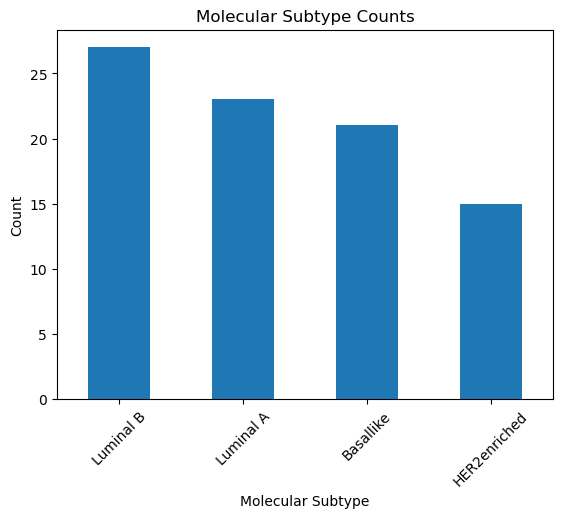

In [74]:
# plot counts for each molecular subtype to see count for each class
counts = data['PAM50_mRNA'].value_counts()
fig, ax = plt.subplots()
counts.plot(kind='bar', ax=ax)
ax.set_title("Molecular Subtype Counts")
ax.set_xlabel("Molecular Subtype")
ax.set_ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [14]:
X = X.reset_index(drop=True)
X

,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,NP_076965,...,NP_001193600,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494
0,0.694424,0.698098,0.687077,0.687077,0.698098,0.698098,0.698098,-2.652150,-0.984373,-0.547225,...,NaN,NaN,1.153614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.104164,0.107491,0.097512,0.104164,0.104164,0.104164,0.104164,-0.880454,-1.512473,-1.406028,...,0.919136,-1.648856,0.832649,NaN,-8.324969,-4.679219,NaN,-1.106650,NaN,-6.941181
2,-0.927979,-0.927979,-0.931806,-0.927979,-0.927979,-0.927979,-0.927979,-3.071151,-2.278943,-2.236845,...,-0.801685,NaN,NaN,3.802310,-6.373934,-1.123160,NaN,NaN,NaN,NaN
3,0.472590,0.472590,0.458587,0.472590,0.472590,0.472590,0.472590,-0.742871,1.811277,1.956909,...,-4.966177,-1.471027,NaN,-0.474013,-12.278546,-10.337729,-0.653251,NaN,NaN,NaN
4,1.192612,1.188860,1.185108,1.200116,1.188860,1.188860,1.192612,1.046289,2.138081,1.732880,...,1.451490,-2.018981,0.877456,NaN,NaN,-6.101005,NaN,-1.726336,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2.779709,2.779709,2.797995,2.787023,2.779709,2.783366,2.783366,2.205538,0.749997,-0.156974,...,-3.250913,1.711825,-0.248402,NaN,4.707022,4.107251,-3.203370,1.971481,NaN,NaN
76,0.542211,0.542211,0.534981,0.542211,0.542211,0.542211,0.542211,-0.148205,0.267490,0.159048,...,-5.107629,-0.975980,NaN,2.508629,-12.337110,-9.546530,-4.066584,NaN,NaN,NaN
77,0.870186,0.870186,0.866423,0.870186,0.870186,0.870186,0.870186,1.920171,2.349197,1.581466,...,-3.386203,-2.328692,-2.806642,NaN,-4.733495,-9.584499,-4.786183,-3.103949,NaN,NaN
78,-1.095492,-1.095492,-1.095492,-1.095492,-1.093252,-1.093252,-1.093252,0.096627,-1.149272,-1.270277,...,-0.638364,0.051811,2.509998,7.067839,NaN,0.378972,NaN,NaN,0.665797,NaN


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, TCGA-A2-A0CM to TCGA-E2-A15A
Columns: 12552 entries, NP_958785 to PAM50_mRNA
dtypes: float64(12551), object(1)
memory usage: 8.2+ MB


## Remove outliers before split

In [17]:
# Calculate quartiles, IQR, and limits for all columns
quartiles = data.quantile([0.25, 0.75])
q1 = quartiles.loc[0.25]
q3 = quartiles.loc[0.75]
iqr = q3 - q1
lower_lim = q1 - 1.5 * iqr
upper_lim = q3 + 1.5 * iqr

# Detect outliers for all columns at once
outliers = (data < lower_lim) | (data > upper_lim)

# Drop columns with outliers
outlier_cols = outliers.any()
if outlier_cols.any():
    data = data.drop(columns=outlier_cols.index[outlier_cols])

/tmp/ipykernel_65/3837871663.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quartiles = data.quantile([0.25, 0.75])
/tmp/ipykernel_65/3837871663.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (data < lower_lim) | (data > upper_lim)


# Split data into training, validation, and test

In [109]:
# Shuffle the data
data = data.sample(frac=1, random_state=42)
print(data.shape)

y = data["PAM50_mRNA"]
X = data.iloc[:,1:3628]

# Split the data into training and test sets
X_train_data, X_test, y_train_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_data, y_train_data, test_size=0.2, random_state=42)

print(X_train.shape)

(86, 3629)
(54, 3627)


In [81]:
X_train.shape

(55, 3627)

# Exploratory Analysis


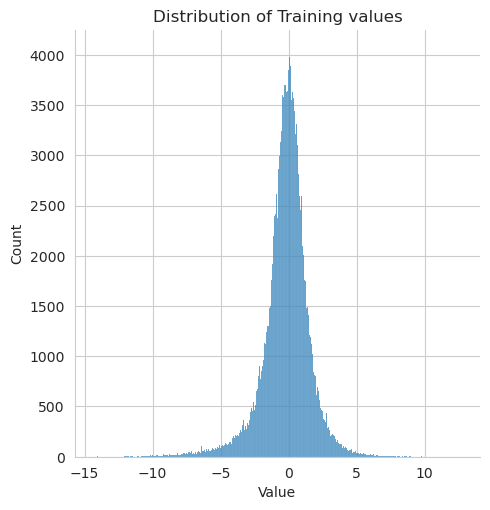

In [97]:
# Melt the DataFrame to convert it to long format
melted_df = pd.melt(X_train)
# Create a displot of the values
sns.displot(melted_df, x="value", kind="hist")
# Add a title and adjust x-axis range
sns.set_style("whitegrid")
plt.title("Distribution of Training values")
plt.xlabel("Value")
plt.xlim(xmin=min(melted_df["value"]), xmax=max(melted_df["value"]) + 1)
plt.show()

## Use Median Imputation to Replace NA values

In [110]:
#use median for data imputation since not a normal distribution 

X_train = X_train.fillna(X_train.median())
X_val = X_val.fillna(X_val.median())
le = LabelEncoder()
# y_train = y_train.str.replace('-', '')
y_train_encoded = le.fit_transform(y_train)
#checking class names
print("Unique integer labels:", np.unique(y_train_encoded))
print("Corresponding classes:", le.classes_)

y_test_encoded = le.transform(y_test)
y_val_encoded = le.transform(y_val)



Unique integer labels: [0 1 2 3]
Corresponding classes: ['Basallike' 'HER2enriched' 'Luminal A' 'Luminal B']


## Scale data

In [111]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# Scale the validation data using the scaler fitted on the training data
X_val_scaled = scaler.transform(X_val)

In [112]:
nan_indices = np.isnan(X_train_scaled)
nan_values = X_train_scaled[nan_indices]
print(nan_values)

[]


## Randomized Search to Find best Parameters for Logistic Regression and SVM model

### SVM 

In [100]:
param_distributions = {
    'C': uniform(loc=0, scale=10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': randint(1, 6),
    'gamma': ['scale', 'auto'] + list(uniform(loc=0, scale=10).rvs(10)),
    'shrinking': [True, False],
    'tol': uniform(loc=0, scale=0.01),
    'max_iter': [-1, 100, 1000, 10000],
}

svm = SVC()

random_search = RandomizedSearchCV(svm, param_distributions=param_distributions, n_iter=20, cv=5)
random_search.fit(X_train_scaled, y_train_encoded)

# Print the best hyperparameters found by the randomized search
print("Best hyperparameters found: ")
for param, value in random_search.best_params_.items():
    print(param, ":", value)

final_svm = SVC(**random_search.best_params_)
final_svm.fit(X_train_scaled, y_train_encoded)
y_pred = final_svm.predict(X_val_scaled)
print(classification_report(y_val_encoded, y_pred))
f1 = f1_score(y_val_encoded, y_pred, average='macro')
print('Macro f1 score from report', f1)

Best hyperparameters found: 
C : 0.5179359204137579
degree : 3
gamma : 7.047959676562055
kernel : linear
max_iter : 10000
shrinking : True
tol : 0.0018282580002387128
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.33      0.50         3
           2       0.40      1.00      0.57         2
           3       1.00      0.50      0.67         4

    accuracy                           0.71        14
   macro avg       0.81      0.71      0.66        14
weighted avg       0.85      0.71      0.70        14

Macro f1 score from report 0.6617965367965368


### Logistic Regression

In [69]:
#Parameter distribution
param_distributions = {
    'penalty': ['l2', 'elasticnet'],
    'C': uniform(loc=0, scale=10),
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

log_model = LogisticRegression(multi_class='multinomial', max_iter=10000)
random_search = RandomizedSearchCV(log_model, param_distributions=param_distributions, n_iter=20, cv=5)
random_search.fit(X_train_scaled, y_train_encoded)

print("Best hyperparameters found:", random_search.best_params_)

final_log_model = LogisticRegression(multi_class='multinomial', max_iter=10000, **random_search.best_params_)
final_log_model.fit(X_train_scaled, y_train_encoded)

y_pred = final_log_model.predict(X_val_scaled)
print(classification_report(y_val_encoded, y_pred))
f1 = f1_score(y_val_encoded, y_pred, average='macro')
print('Macro f1 score from report', f1)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose, prefer=prefer)(
  File "/opt/conda/lib/python3.10/site-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(itera

Best hyperparameters found: {'C': 9.56937380930103, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2
           2       0.67      0.40      0.50         5
           3       0.40      0.67      0.50         3

    accuracy                           0.64        14
   macro avg       0.72      0.64      0.64        14
weighted avg       0.70      0.64      0.63        14

Macro f1 score from report 0.6388888888888888


## Feature Selection Methods 

## Lasso Ridge

In [113]:
sel_ = SelectFromModel(LogisticRegression(
    C=0.5, penalty='l1', solver='liblinear', random_state=10,
)) 
#sel_.fit(scaler.transform(X_validation), y_validation)
sel_.fit(X_train_scaled, y_train_encoded)

X_train_selected = sel_.transform(X_train_scaled) 
X_val_selected = sel_.transform(X_val_scaled)

In [115]:
# Define the SVM model
# Define the SVM model with best hyperparameters
SVM_model = SVC(kernel='linear', C=0.5179359204137579, gamma=7.047959676562055, degree=3, max_iter=10000, shrinking=True, tol=0.0018282580002387128)

# Define the logistic regression model
log_model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l2', max_iter=25000, C=1.1926210341784587)

# Train the SVM model on the reduced training data
SVM_model.fit(X_train_selected, y_train_encoded)

# Train the logistic regression model on the reduced training data
log_model.fit(X_train_selected, y_train_encoded)

# Use the trained SVM model to predict on the reduced validation data
y_pred_svm = SVM_model.predict(X_val_selected)

# Use the trained logistic regression model to predict on the reduced validation data
y_pred_log = log_model.predict(X_val_selected)

# Evaluate the performance of the SVM model using F1-score
f1_macro_svm = f1_score(y_val_encoded, y_pred_svm, average='macro')
print(f"F1-score (macro) on validation data using SVM: {f1_macro_svm:.3f}")

# Evaluate the performance of the logistic regression model using F1-score
f1_macro_log = f1_score(y_val_encoded, y_pred_log, average='macro')
print(f"F1-score (macro) on validation data using logistic regression: {f1_macro_log:.3f}")

F1-score (macro) on validation data using SVM: 0.492
F1-score (macro) on validation data using logistic regression: 0.503


In [77]:
selected_feat = X_train.columns[(sel_.get_support())]
selected_feat

Index(['NP_005029', 'NP_003861', 'NP_001265272', 'NP_001095', 'NP_003557',
       'NP_542785', 'NP_940978', 'NP_001371', 'NP_061903', 'NP_055912',
       ...
       'NP_899229', 'NP_036547', 'NP_001321', 'NP_789776', 'NP_006496',
       'NP_640338', 'NP_006084', 'NP_061157', 'NP_001258074', 'NP_001245240'],
      dtype='object', length=104)

In [23]:
print('selected features: {}'.format(len(selected_feat)))

selected features: 104


## Feature Selection 
Try mulitple methods for data reduction and compare unsupervised learning with models to see how data clusters

# KMEANS on PCA selected Features

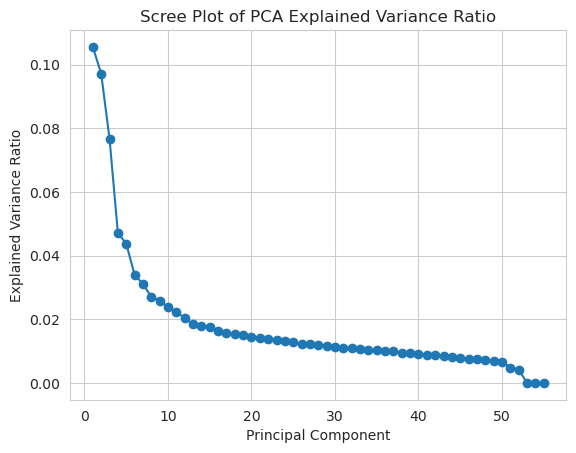

In [85]:
# fit PCA model to find num of components
pca = PCA()
pca.fit(X_train_scaled)

# plot explained variance ratio
import matplotlib.pyplot as plt
plt.plot(range(1, 56), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.title('Scree Plot of PCA Explained Variance Ratio')
plt.ylabel('Explained Variance Ratio')
plt.show()

From elbow plot, try 2, 5, 10 for number of PCA components

In [117]:
# Define number of clusters
n_clusters = 4

for n_components in [2, 5, 10]:
    # Create PCA model for data reduction
    pca_model = PCA(n_components=n_components, random_state=42)

    # Fit PCA model on the training data
    X_pca = pca_model.fit_transform(X_train_scaled)

    # Create K-means clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Fit the model on the PCA-transformed data
    kmeans.fit(X_pca)

    # Get the predicted cluster labels
    y_pred = kmeans.labels_

    # Define models to be used
    log_model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l2', max_iter=25000, C=37.92690190732238)
   # Define the SVM model with best hyperparameters
    SVC_model = SVC(kernel='linear', C=0.5179359204137579, gamma=7.047959676562055, degree=3, max_iter=10000, shrinking=True, tol=0.0018282580002387128)

    # Train a logistic regression model on the reduced training data
    log_model.fit(X_pca, y_train_encoded)

    # Train an SVM model on the reduced training data
    SVC_model.fit(X_pca, y_train_encoded)

    # Apply the same feature selection and scaling transformations to validation data
    X_val_pca = pca_model.transform(X_val_scaled)

    # Use the trained logistic regression model to predict on the reduced validation data
    y_pred_log = log_model.predict(X_val_pca)

    # Use the trained SVM model to predict on the reduced validation data
    y_pred_svc = SVC_model.predict(X_val_pca)

    # Evaluate the performance of the logistic regression model using F1-score
    f1_macro_log = f1_score(y_val_encoded, y_pred_log, average='macro')
    print(f"F1-score (macro) on validation data with {n_components} PCA components using logistic regression: {f1_macro_log:.3f}")

    # Evaluate the performance of the SVM model using F1-score
    f1_macro_svc = f1_score(y_val_encoded, y_pred_svc, average='macro')
    print(f"F1-score (macro) on validation data with {n_components} PCA components using SVM: {f1_macro_svc:.3f}")

    # Calculate purity score and silhouette score of the K-means clustering
    contingency_mat = contingency_matrix(y_train_encoded, y_pred)
    purity_score = np.sum(np.amax(contingency_mat, axis=0)) / np.sum(contingency_mat)
    silhouette_scores = silhouette_score(X_pca, y_pred)

    print(f"Purity score for {n_components} components: {purity_score:.3f}")
    print(f"Silhouette score for {n_components} components: {silhouette_scores:.3f}")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


F1-score (macro) on validation data with 2 PCA components using logistic regression: 0.258
F1-score (macro) on validation data with 2 PCA components using SVM: 0.258
Purity score for 2 components: 0.426
Silhouette score for 2 components: 0.429


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


F1-score (macro) on validation data with 5 PCA components using logistic regression: 0.497
F1-score (macro) on validation data with 5 PCA components using SVM: 0.379
Purity score for 5 components: 0.444
Silhouette score for 5 components: 0.282


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


F1-score (macro) on validation data with 10 PCA components using logistic regression: 0.442
F1-score (macro) on validation data with 10 PCA components using SVM: 0.400
Purity score for 10 components: 0.463
Silhouette score for 10 components: 0.174


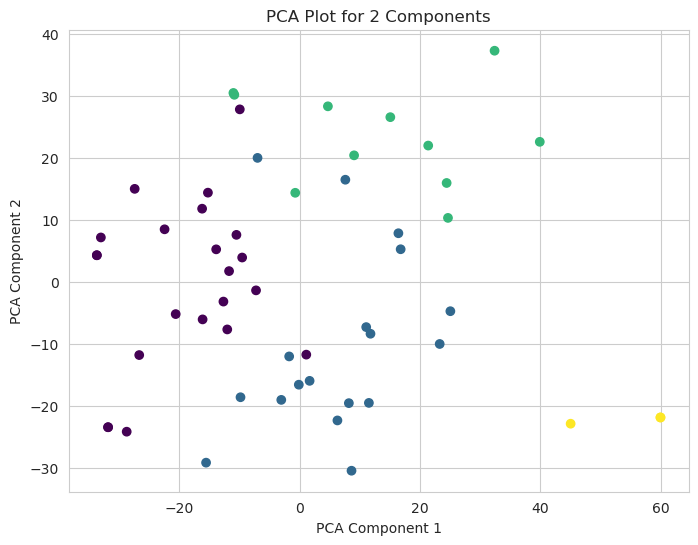

In [118]:
# Plot PCA components
 # Create PCA model for data reduction
pca_model = PCA(n_components=2, random_state=42)

# Fit PCA model on the training data
X_pca = pca_model.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis')
plt.title(f"PCA Plot for 2 Components")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# KMeans with UMAP

In [119]:
# Define number of clusters
n_clusters = 4

for n_components in [2, 5, 10]:
    # Create UMAP model for data reduction
    umap_model = umap.UMAP(n_components=n_components, random_state=42)

    # Fit UMAP model on the training data
    X_umap = umap_model.fit_transform(X_train_scaled)

    # Create K-means clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Fit the model on the UMAP-transformed data
    kmeans.fit(X_umap)

    # Get the predicted cluster labels
    y_pred = kmeans.labels_

    # Define models to be used
    log_model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l2', max_iter=25000, C=37.92690190732238)
    # Define the SVM model with best hyperparameters
    SVC_model = SVC(kernel='linear', C=0.5179359204137579, gamma=7.047959676562055, degree=3, max_iter=10000, shrinking=True, tol=0.0018282580002387128)

    # Train a logistic regression model on the reduced training data
    log_model.fit(X_umap, y_train_encoded)

    # Train an SVM model on the reduced training data
    SVC_model.fit(X_umap, y_train_encoded)

   # Use the trained logistic regression model to predict on the reduced validation data
    X_val_umap = umap_model.transform(X_val_scaled)
    y_pred_log = log_model.predict(X_val_umap)

    # Use the trained SVM model to predict on the reduced validation data
    y_pred_svc = SVC_model.predict(X_val_umap)

    # Evaluate the performance of the logistic regression model using F1-score
    f1_macro_log = f1_score(y_val_encoded, y_pred_log, average='macro')
    print(f"F1-score (macro) on validation data with {n_components} UMAP components using logistic regression: {f1_macro_log:.3f}")

    # Evaluate the performance of the SVM model using F1-score
    f1_macro_svc = f1_score(y_val_encoded, y_pred_svc, average='macro')
    print(f"F1-score (macro) on validation data with {n_components} UMAP components using SVM: {f1_macro_svc:.3f}")

    # Calculate purity score and silhouette score of the K-means clustering
    contingency_mat = contingency_matrix(y_train_encoded, y_pred)
    purity_score = np.sum(np.amax(contingency_mat, axis=0)) / np.sum(contingency_mat)
    silhouette_scores = silhouette_score(X_umap, y_pred)

    print(f"Purity score for {n_components} components: {purity_score:.3f}")
    print(f"Silhouette score for {n_components} components: {silhouette_scores:.3f}")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


F1-score (macro) on validation data with 2 UMAP components using logistic regression: 0.196
F1-score (macro) on validation data with 2 UMAP components using SVM: 0.361
Purity score for 2 components: 0.537
Silhouette score for 2 components: 0.387


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


F1-score (macro) on validation data with 5 UMAP components using logistic regression: 0.421
F1-score (macro) on validation data with 5 UMAP components using SVM: 0.500
Purity score for 5 components: 0.556
Silhouette score for 5 components: 0.355


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


F1-score (macro) on validation data with 10 UMAP components using logistic regression: 0.497
F1-score (macro) on validation data with 10 UMAP components using SVM: 0.500
Purity score for 10 components: 0.574
Silhouette score for 10 components: 0.351


# Kmeans with Kernel PCA

In [121]:
# Define number of clusters
n_clusters = 4

for n_components in [2, 5, 10]:
    # Create Kernel PCA model for data reduction
    kpca_model = KernelPCA(n_components=n_components, kernel='rbf', random_state=42)

    # Fit Kernel PCA model on the training data
    X_kpca = kpca_model.fit_transform(X_train_scaled)

    # Create K-means clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Fit the model on the Kernel PCA-transformed data
    kmeans.fit(X_kpca)

    # Get the predicted cluster labels
    y_pred = kmeans.labels_

    # Define models to be used
    log_model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l2', max_iter=25000, C=37.92690190732238)
    # Define the SVM model with best hyperparameters
    SVC_model = SVC(kernel='linear', C=0.5179359204137579, gamma=7.047959676562055, degree=3, max_iter=10000, shrinking=True, tol=0.0018282580002387128)

    # Train a logistic regression model on the reduced training data
    log_model.fit(X_kpca, y_train_encoded)

    # Train an SVM model on the reduced training data
    SVC_model.fit(X_kpca, y_train_encoded)

    # Apply the same feature selection, scaling, and Kernel PCA transformations to validation data
    X_val_kpca = kpca_model.transform(X_val_scaled)

    # Use the trained logistic regression model to predict on the reduced validation data
    y_pred_log = log_model.predict(X_val_kpca)

    # Use the trained SVM model to predict on the reduced validation data
    y_pred_svc = SVC_model.predict(X_val_kpca)

    # Evaluate the performance of the logistic regression model using F1-score
    f1_macro_log = f1_score(y_val_encoded, y_pred_log, average='macro')
    print(f"F1-score (macro) on validation data with {n_components} Kernel PCA components using logistic regression: {f1_macro_log:.3f}")

    # Evaluate the performance of the SVM model using F1-score
    f1_macro_svc = f1_score(y_val_encoded, y_pred_svc, average='macro')
    print(f"F1-score (macro) on validation data with {n_components} Kernel PCA components using SVM: {f1_macro_svc:.3f}")

    # Calculate purity score and silhouette score of the K-means clustering
    contingency_mat = contingency_matrix(y_train_encoded, y_pred)
    purity_score = np.sum(np.amax(contingency_mat, axis=0)) / np.sum(contingency_mat)
    silhouette_scores = silhouette_score(X_kpca, y_pred)

    print(f"Purity score for {n_components} components: {purity_score:.3f}")
    print(f"Silhouette score for {n_components} components: {silhouette_scores:.3f}")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


F1-score (macro) on validation data with 2 Kernel PCA components using logistic regression: 0.274
F1-score (macro) on validation data with 2 Kernel PCA components using SVM: 0.088
Purity score for 2 components: 0.500
Silhouette score for 2 components: 0.424
F1-score (macro) on validation data with 5 Kernel PCA components using logistic regression: 0.363
F1-score (macro) on validation data with 5 Kernel PCA components using SVM: 0.219
Purity score for 5 components: 0.426
Silhouette score for 5 components: 0.331


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


F1-score (macro) on validation data with 10 Kernel PCA components using logistic regression: 0.446
F1-score (macro) on validation data with 10 Kernel PCA components using SVM: 0.219
Purity score for 10 components: 0.519
Silhouette score for 10 components: 0.172


Silhouette Score of Kmeans clusters measures how similar an object is to its own cluster compared to other clusters, higher values indicate better clustering, the final score was .03 indicates a relatively weak separation between the clusters, meaning that the clusters are not well separated from each other.
Adjusted Rand Index (ARI): This score measures the similarity between the true class labels and the predicted cluster labels. It ranges from -1 to 1, with higher values indicating better clustering. The closer the score is to 1 the better the cluster was at identifying the class , this score was very low, indciating it didnt cluster well
Homogeneity score of 0.19867409671574482 indicates that the clusters are not very homogeneous, meaning that they don't correspond very well to the true classes.
Completeness score of 0.19332448019909426 suggests that the algorithm did not do a good job in assigning samples from the same class to the same cluster
V_measure score of 0.1959627852676625 indicates that the clustering algorithm has a relatively low overall performance, likely due to low homogeneity and completeness scores.
WCSS is a measure of the sum of squared distances between each data point and the centroid of its assigned cluster.
WCSS values are plotted against the number of clusters. The idea is to identify the "elbow point" in the plot, which is the number of clusters where the rate of decrease in WCSS slows down significantly

### Table with Final Results for Each Component and Clustering Method

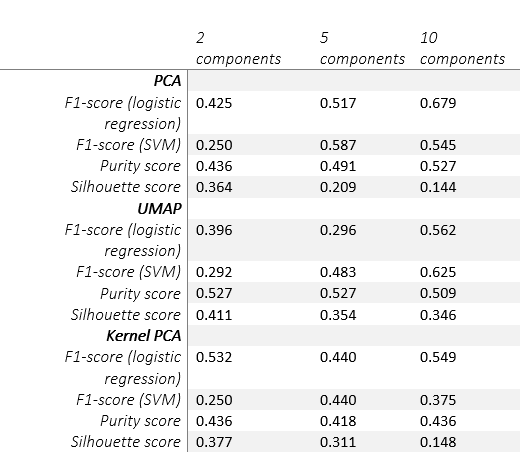

# Neural Networks

### One-hot encode y variables

In [43]:
# One-hot encode the target variable
num_classes = 4
y_train_onehot = to_categorical(y_train_encoded, num_classes=num_classes)
y_val_onehot = to_categorical(y_val_encoded, num_classes=num_classes)

print(y_train_onehot.shape)
print(y_val_onehot.shape)

(55, 4)
(14, 4)


In [46]:
X_val_scaled.shape

(14, 3627)

## FNN model on all Features
Uses macro f1 score for model evaluation

In [56]:
# Define the macro F1 score function
def macro_f1(y_true, y_pred):
    # Convert predictions to binary values
    y_pred = keras.backend.round(y_pred)
    # Calculate F1 score for each class
    f1s = []
    for i in range(y_true.shape[1]):
        tp = keras.backend.sum(keras.backend.cast(y_true[:, i] * y_pred[:, i], 'float'), axis=0)
        fp = keras.backend.sum(keras.backend.cast((1-y_true[:, i]) * y_pred[:, i], 'float'), axis=0)
        fn = keras.backend.sum(keras.backend.cast(y_true[:, i] * (1-y_pred[:, i]), 'float'), axis=0)
        precision = tp / (tp + fp + keras.backend.epsilon())
        recall = tp / (tp + fn + keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + keras.backend.epsilon())
        f1s.append(f1)
    # Calculate macro F1 score
    macro_f1 = keras.backend.mean(keras.backend.stack(f1s))
    return macro_f1

def create_model(hp):
    # Define the model architecture
    model = keras.Sequential()
    print('Input shape:', X_train_scaled.shape[1:])
    model.add(layers.Flatten(input_shape=(X_train_scaled.shape[1],)))
    # Tune the number of hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        # Tune the number of units in each hidden layer
        model.add(layers.Dense(units=hp.Int('units_' + str(i), 32, 512, 32), activation='relu'))
        # Tune the dropout rate for each hidden layer
        model.add(layers.Dropout(hp.Float('dropout_' + str(i), 0, 0.5, 0.1)))
        print('Output shape of layer', i+1, ':', model.output_shape)
    model.add(layers.Dense(4, activation='softmax'))
    print('Output shape:', model.output_shape)
    
    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=[macro_f1])
    return model

# Define the Keras Tuner
tuner = RandomSearch(
    create_model,
    objective=keras_tuner.Objective('val_macro_f1', direction='max'),
    max_trials=10,
    directory='my_dir',
    project_name='fnn_model_2')

# Search for the best hyperparameters
tuner.search(X_train_scaled, y_train_onehot, epochs=5, validation_data=(X_val_scaled, y_val_onehot))

# # Get the best model
best_fnn_model = tuner.get_best_models(num_models=1)[0]

# Train the best model on the full dataset
best_fnn_model.fit(X_train_scaled, y_train_onehot, epochs=10, validation_data=(X_val_scaled, y_val_onehot))

Trial 10 Complete [00h 00m 06s]
val_macro_f1: 0.6624999642372131

Best val_macro_f1 So Far: 0.75
Total elapsed time: 00h 00m 55s
INFO:tensorflow:Oracle triggered exit
Input shape: (3627,)
Output shape of layer 1 : (None, 192)
Output shape: (None, 4)
Epoch 1/10
2/2 [==============================] - 2s 670ms/step - loss: 0.7555 - macro_f1: 0.9004 - val_loss: 7.0751 - val_macro_f1: 0.6083
Epoch 2/10
2/2 [==============================] - 0s 114ms/step - loss: 0.4914 - macro_f1: 0.9688 - val_loss: 7.8956 - val_macro_f1: 0.7083
Epoch 3/10
2/2 [==============================] - 0s 57ms/step - loss: 0.7936 - macro_f1: 0.9634 - val_loss: 10.4187 - val_macro_f1: 0.6190
Epoch 4/10
2/2 [==============================] - 0s 80ms/step - loss: 0.1714 - macro_f1: 0.9827 - val_loss: 14.9173 - val_macro_f1: 0.6190
Epoch 5/10
2/2 [==============================] - 0s 62ms/step - loss: 7.7781e-05 - macro_f1: 1.0000 - val_loss: 18.1132 - val_macro_f1: 0.6190
Epoch 6/10
2/2 [==============================

## CNN Model on all Features
Use macro f1 function above to evaluate model

In [59]:
def build_model(hp):
    model = keras.Sequential()

    # Tune the number of filters and kernel size for the first convolutional layer
    model.add(Conv1D(filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
                     kernel_size=hp.Choice('conv1_kernel', values=[3, 5]),
                     activation='relu',
                     input_shape=(X_train_scaled.shape[1], 1)))

    model.add(MaxPooling1D(pool_size=2))

    # Tune the number of units in the first dense layer
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense1_units', min_value=32, max_value=256, step=32),
                    activation='relu'))

    model.add(Dense(4, activation='softmax'))

    # Tune the learning rate for the optimizer
    opt = keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))

    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=[keras.metrics.CategoricalAccuracy(), macro_f1])
    return model


# Reshape the data for the Conv1D layer
X_train_scaled_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_scaled_cnn = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
tuner = RandomSearch(
    build_model,
    objective=keras_tuner.Objective('val_macro_f1', direction='max'),
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='cnn_model')

# Search for the best hyperparameters
tuner.search(X_train_scaled_cnn, y_train_onehot, epochs=5, validation_data=(X_val_scaled_cnn, y_val_onehot))

# Get the best model
best_cnn_model = tuner.get_best_models(num_models=1)[0]

# Train the best model on the full dataset
best_cnn_model.fit(X_train_scaled_cnn, y_train_onehot, epochs=10, validation_data=(X_val_scaled_cnn, y_val_onehot))


INFO:tensorflow:Reloading Tuner from my_dir/cnn_model/tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
2/2 [==============================] - 15s 3s/step - loss: 0.0697 - categorical_accuracy: 1.0000 - macro_f1: 1.0000 - val_loss: 1.1140 - val_categorical_accuracy: 0.5714 - val_macro_f1: 0.5774
Epoch 2/10
2/2 [==============================] - 4s 2s/step - loss: 0.0563 - categorical_accuracy: 1.0000 - macro_f1: 1.0000 - val_loss: 1.7860 - val_categorical_accuracy: 0.5714 - val_macro_f1: 0.5179
Epoch 3/10
2/2 [==============================] - 5s 2s/step - loss: 0.0708 - categorical_accuracy: 0.9636 - macro_f1: 0.9664 - val_loss: 1.8666 - val_categorical_accuracy: 0.5000 - val_macro_f1: 0.4833
Epoch 4/10
2/2 [==============================] - 5s 2s/step - loss: 0.0474 - categorical_accuracy: 0.9818 - macro_f1: 0.9926 - val_loss: 1.7802 - val_categorical_accuracy: 0.5000 - val_macro_f1: 0.5250
Epoch 5/10
2/2 [==============================] - 4s 2s/step - loss: 0.0148 - categ

## Run Deep Learning Models on Lasso Feature Selected

### FNN Model on Lasso Feature Selected Data

In [61]:
# Define the macro F1 score function
def macro_f1(y_true, y_pred):
    # Convert predictions to binary values
    y_pred = keras.backend.round(y_pred)
    # Calculate F1 score for each class
    f1s = []
    for i in range(y_true.shape[1]):
        tp = keras.backend.sum(keras.backend.cast(y_true[:, i] * y_pred[:, i], 'float'), axis=0)
        fp = keras.backend.sum(keras.backend.cast((1-y_true[:, i]) * y_pred[:, i], 'float'), axis=0)
        fn = keras.backend.sum(keras.backend.cast(y_true[:, i] * (1-y_pred[:, i]), 'float'), axis=0)
        precision = tp / (tp + fp + keras.backend.epsilon())
        recall = tp / (tp + fn + keras.backend.epsilon())
        f1 = 2 * precision * recall / (precision + recall + keras.backend.epsilon())
        f1s.append(f1)
    # Calculate macro F1 score
    macro_f1 = keras.backend.mean(keras.backend.stack(f1s))
    return macro_f1

def create_model(hp):
    # Define the model architecture
    model = keras.Sequential()
    print('Input shape:', X_train_selected.shape[1:])
    model.add(layers.Flatten(input_shape=(X_train_selected.shape[1],)))
    # Tune the number of hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        # Tune the number of units in each hidden layer
        model.add(layers.Dense(units=hp.Int('units_' + str(i), 32, 512, 32), activation='relu'))
        # Tune the dropout rate for each hidden layer
        model.add(layers.Dropout(hp.Float('dropout_' + str(i), 0, 0.5, 0.1)))
        print('Output shape of layer', i+1, ':', model.output_shape)
    model.add(layers.Dense(4, activation='softmax'))
    print('Output shape:', model.output_shape)
    
    # Compile the model
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=[macro_f1])
    return model

# Define the Keras Tuner
tuner = RandomSearch(
    create_model,
    objective=keras_tuner.Objective('val_macro_f1', direction='max'),
    max_trials=10,
    directory='my_dir',
    project_name='fnn_model_lasso')

# Search for the best hyperparameters
tuner.search(X_train_selected, y_train_onehot, epochs=5, validation_data=(X_val_selected, y_val_onehot))

# # Get the best model
best_fnn_lasso_model = tuner.get_best_models(num_models=1)[0]

# Train the best model on the full dataset
best_fnn_lasso_model.fit(X_train_selected, y_train_onehot, epochs=10, validation_data=(X_val_selected, y_val_onehot))

Trial 10 Complete [00h 00m 04s]
val_macro_f1: 0.5476189851760864

Best val_macro_f1 So Far: 0.7142857313156128
Total elapsed time: 00h 00m 47s
INFO:tensorflow:Oracle triggered exit
Input shape: (109,)
Output shape of layer 1 : (None, 320)
Output shape: (None, 4)
Epoch 1/10
2/2 [==============================] - 2s 650ms/step - loss: 0.1349 - macro_f1: 1.0000 - val_loss: 1.0539 - val_macro_f1: 0.7024
Epoch 2/10
2/2 [==============================] - 0s 57ms/step - loss: 0.0888 - macro_f1: 1.0000 - val_loss: 1.0488 - val_macro_f1: 0.7024
Epoch 3/10
2/2 [==============================] - 0s 52ms/step - loss: 0.0604 - macro_f1: 1.0000 - val_loss: 1.0526 - val_macro_f1: 0.6607
Epoch 4/10
2/2 [==============================] - 0s 53ms/step - loss: 0.0433 - macro_f1: 1.0000 - val_loss: 1.0623 - val_macro_f1: 0.6607
Epoch 5/10
2/2 [==============================] - 0s 53ms/step - loss: 0.0321 - macro_f1: 1.0000 - val_loss: 1.0743 - val_macro_f1: 0.6607
Epoch 6/10
2/2 [=========================

### CNN Model on Lasso Feature Selected Data

In [66]:
def build_model(hp):
    model = keras.Sequential()

    # Tune the number of filters and kernel size for the first convolutional layer
    model.add(Conv1D(filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
                     kernel_size=hp.Choice('conv1_kernel', values=[3, 5]),
                     activation='relu',
                     input_shape=(X_train_selected.shape[1], 1)))

    model.add(MaxPooling1D(pool_size=2))

    # Tune the number of units in the first dense layer
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense1_units', min_value=32, max_value=256, step=32),
                    activation='relu'))

    model.add(Dense(4, activation='softmax'))

    # Tune the learning rate for the optimizer
    opt = keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))

    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  metrics=[keras.metrics.CategoricalAccuracy(), macro_f1])
    return model


# Reshape the data for the Conv1D layer
X_train_scaled_cnn = X_train_selected.reshape(X_train_selected.shape[0], X_train_selected.shape[1], 1)
X_val_scaled_cnn = X_val_selected.reshape(X_val_selected.shape[0], X_val_selected.shape[1], 1)
tuner = RandomSearch(
    build_model,
    objective=keras_tuner.Objective('val_macro_f1', direction='max'),
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='cnn_model_lasso')

# Search for the best hyperparameters
tuner.search(X_train_scaled_cnn, y_train_onehot, epochs=5, validation_data=(X_val_scaled_cnn, y_val_onehot))

# Get the best model
best_cnn_lasso_model = tuner.get_best_models(num_models=1)[0]

# Train the best model on the full dataset
best_cnn__lasso_model.fit(X_train_scaled_cnn, y_train_onehot, epochs=10, validation_data=(X_val_scaled_cnn, y_val_onehot))


Trial 10 Complete [00h 00m 12s]
val_macro_f1: 0.3058200776576996

Best val_macro_f1 So Far: 0.6900793115297953
Total elapsed time: 00h 01m 50s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
2/2 [==============================] - 3s 754ms/step - loss: 0.0228 - categorical_accuracy: 1.0000 - macro_f1: 1.0000 - val_loss: 1.0935 - val_categorical_accuracy: 0.7143 - val_macro_f1: 0.7571
Epoch 2/10
2/2 [==============================] - 0s 66ms/step - loss: 0.0119 - categorical_accuracy: 1.0000 - macro_f1: 1.0000 - val_loss: 1.1579 - val_categorical_accuracy: 0.7143 - val_macro_f1: 0.7571
Epoch 3/10
2/2 [==============================] - 0s 64ms/step - loss: 0.0069 - categorical_accuracy: 1.0000 - macro_f1: 1.0000 - val_loss: 1.2262 - val_categorical_accuracy: 0.7143 - val_macro_f1: 0.7571
Epoch 4/10
2/2 [==============================] - 0s 65ms/step - loss: 0.0043 - categorical_accuracy: 1.0000 - macro_f1: 1.0000 - val_loss: 1.2875 - val_categorical_accuracy: 0.7143 - val_macro_f1: 0.757

### Table with all Models and Corresponding F1 scores

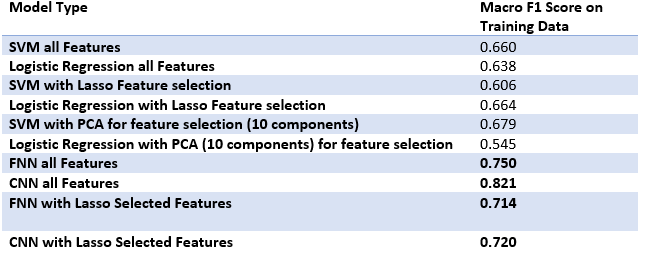

## Run Final Models with Test Data

In [57]:
#Preprocess testing data
X_test = X_test.fillna(X_test.median())
#Scale
X_test_scaled = scaler.transform(X_test)
#Onehot
num_classes = 4
y_test_onehot = to_categorical(y_test_encoded, num_classes=num_classes)
print(y_test_onehot.shape)

(17, 4)


### Scale testing with Lasso Features

In [63]:
X_test_selected = sel_.transform(X_test_scaled)

## Run testing data on best models from training
Best performance was CNN and FNN models on all features

### FNN Model on Testing Data

In [58]:
# Evaluate the best model on testing data
test_loss, test_macro_f1 = best_fnn_model.evaluate(X_test_scaled, y_test_onehot)
print('Test loss:', test_loss)
print('Test macro F1 score:', test_macro_f1)

1/1 [==============================] - 0s 49ms/step - loss: 11.0733 - macro_f1: 0.6997
Test loss: 11.0733060836792
Test macro F1 score: 0.6996753215789795


### CNN model on Testing Data

In [60]:
# Reshape the testing data for the Conv1D layer
X_test_scaled_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Evaluate the best model on testing data
test_loss, test_categorical_accuracy, test_macro_f1 = best_cnn_model.evaluate(X_test_scaled_cnn, y_test_onehot)

print('Test loss:', test_loss)
print('Test categorical accuracy:', test_categorical_accuracy)
print('Test macro F1 score:', test_macro_f1)

1/1 [==============================] - 0s 100ms/step - loss: 0.3940 - categorical_accuracy: 0.8824 - macro_f1: 0.8806
Test loss: 0.3939987123012543
Test categorical accuracy: 0.8823529481887817
Test macro F1 score: 0.8805555105209351


### FNN with Lasso Feature Selection on Testing Data

In [64]:
# Evaluate the best model on testing data
test_loss, test_macro_f1 = best_fnn_lasso_model.evaluate(X_test_selected, y_test_onehot)
print('Test loss:', test_loss)
print('Test macro F1 score:', test_macro_f1)

1/1 [==============================] - 0s 61ms/step - loss: 0.5086 - macro_f1: 0.8101
Test loss: 0.5085530877113342
Test macro F1 score: 0.8101190328598022


### CNN with Lasso Feature on Testing Data

In [67]:
# Reshape the testing data for the Conv1D layer
X_test_scaled_cnn = X_test_selected.reshape(X_test_selected.shape[0], X_test_selected.shape[1], 1)
# Evaluate the best model on testing data
test_loss, test_categorical_accuracy, test_macro_f1 = best_cnn_model.evaluate(X_test_scaled_cnn, y_test_onehot)

print('Test loss:', test_loss)
print('Test categorical accuracy:', test_categorical_accuracy)
print('Test macro F1 score:', test_macro_f1)

1/1 [==============================] - 0s 50ms/step - loss: 0.8689 - categorical_accuracy: 0.7059 - macro_f1: 0.6818
Test loss: 0.8689194321632385
Test categorical accuracy: 0.7058823704719543
Test macro F1 score: 0.6818181276321411


## Final Results and Discussion

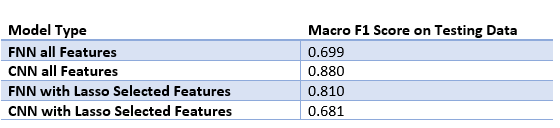

The performance of SVM, logistic regression, and deep learning models were evaluated for classification of breast cancer molecular subtype. While the results indicated promising potential for the use of deep learning in the classification of molecular subtypes using proteomic data, the small dataset, high dimensionality of features, and imbalanced class distribution remained significant limitations. Nonetheless, the SVM and logistic regression models, along with the FNN and CNN models, demonstrated moderate to high f1 scores on testing data. Overall, this project provides useful insights into the application of deep learning models in classification tasks and could potentially inform the development of personalized medicine and cancer diagnosis.